In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DL_projects/Pizza Pasta/Datasets/Train'
valid_path = '/content/drive/MyDrive/DL_projects/Pizza Pasta/Datasets/Test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/DL_projects/Pizza Pasta/Datasets/Train/*')

In [6]:
folders

['/content/drive/MyDrive/DL_projects/Pizza Pasta/Datasets/Train/pizza',
 '/content/drive/MyDrive/DL_projects/Pizza Pasta/Datasets/Train/pasta']

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [8]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:

### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing import image

train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [14]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DL_projects/Pizza Pasta/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 49 images belonging to 2 classes.


In [15]:

# Make sure you provide the same target size as initialied for the image size
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DL_projects/Pizza Pasta/Datasets/Test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 50 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 42s 35s/step - loss: 1.4975 - accuracy: 0.5036 - val_loss: 3.6363 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 3.5428 - accuracy: 0.4964 - val_loss: 0.5137 - val_accuracy: 0.7600
Epoch 3/50
2/2 [==============================] - 3s 2s/step - loss: 0.6615 - accuracy: 0.6903 - val_loss: 1.0540 - val_accuracy: 0.5400
Epoch 4/50
2/2 [==============================] - 3s 2s/step - loss: 0.7961 - accuracy: 0.5318 - val_loss: 0.4881 - val_accuracy: 0.8200
Epoch 5/50
2/2 [==============================] - 3s 2s/step - loss: 0.4854 - accuracy: 0.7915 - val_loss: 0.6842 - val_accuracy: 0.6000
Epoch 6/50
2/2 [==============================] - 3s 2s/step - loss: 0.5818 - accuracy: 0.6614 - val_loss: 0.5113 - val_accuracy: 0.7600
Epoch 7/50
2/2 [==============================] - 3s 2s/step - loss: 0.4396 - accuracy: 0.7795 - val_loss: 0.5344 - val_accuracy: 0.6600
Epoch 8/50
2/2 [=======================

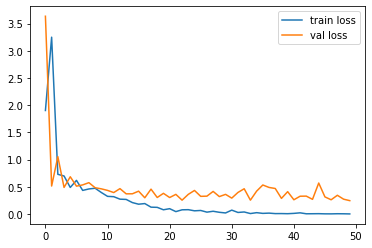

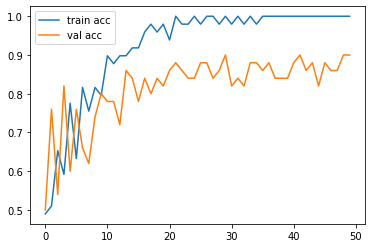

<Figure size 432x288 with 0 Axes>

In [17]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [19]:
y_pred = model.predict(test_set)
y_pred

array([[9.99314666e-01, 6.85393112e-04],
       [9.99992013e-01, 7.96021232e-06],
       [6.07138649e-02, 9.39286172e-01],
       [4.73219203e-04, 9.99526739e-01],
       [9.99111712e-01, 8.88230454e-04],
       [9.99830246e-01, 1.69692197e-04],
       [9.99899387e-01, 1.00586352e-04],
       [9.20109391e-01, 7.98906013e-02],
       [9.99672413e-01, 3.27642396e-04],
       [9.99770820e-01, 2.29187455e-04],
       [9.99997973e-01, 2.03059517e-06],
       [9.97332811e-01, 2.66725128e-03],
       [2.29691927e-04, 9.99770343e-01],
       [1.18841911e-02, 9.88115788e-01],
       [9.98149753e-01, 1.85031141e-03],
       [3.49544197e-01, 6.50455773e-01],
       [6.29797651e-05, 9.99937057e-01],
       [9.99997616e-01, 2.42905662e-06],
       [9.92986500e-01, 7.01351557e-03],
       [9.99982476e-01, 1.74928118e-05],
       [5.56262076e-01, 4.43737954e-01],
       [9.58583057e-01, 4.14169542e-02],
       [1.41587006e-02, 9.85841274e-01],
       [9.99974251e-01, 2.57063311e-05],
       [8.484047

In [20]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [23]:
model=load_model('model_vgg19.h5')

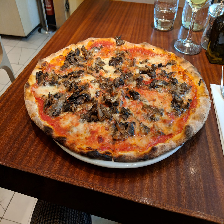

In [39]:

img=image.load_img('/content/drive/MyDrive/DL_projects/Pizza Pasta/Datasets/Test/pizza/Image_297.jpg',target_size=(224,224))
img

In [32]:
#convert into array and sacling

x=image.img_to_array(img)

x=x/255

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
#prediction
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)


In [30]:
if(a==1):
    print("pasta")
else:
    print("pizza")

pizza
